In [7]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# import locale
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
# import warnings

# from checkup_res import checkup_res

# warnings.filterwarnings("ignore")
# locale.setlocale(locale.LC_TIME,'')
pd.options.plotting.backend = "plotly"

In [2]:
data = pd.read_pickle("orders.pkl")
train = data['2021-01-04':'2021-10-10']
test = data["2021-10-11":]

In [36]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from seaborn.utils import ci; sns.set()
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def checkup_res(res):
    fig = plt.subplot(figsize=(15, 8))
    fig.subplots_adjust(left=0.05, right=0.95, hspace=1, wspace=0.05)

    gs = gridspec.GridSpec(3, 3)
    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[1, 2])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])
    ax7 = fig.add_subplot(gs[2, 2])

    # Residuals' plot
    sns.lineplot(data=res, ax=ax1).set(xlabel="Time", ylabel="", title='')
    # ACF
    plot_acf(res.dropna(), ax=ax2)
    # PACF
    plot_pacf(res.dropna(), ax=ax3)
    # Lag
    sns.scatterplot(x=res.values[:-1], y=res.values[1:], ax=ax4).set(xlabel=r'$\epsilon_{t-1}$', ylabel=r'$\epsilon_t$', title='Lag 1')
    # Histogramme
    sns.histplot(res / res.std(), kde=True).set(title='Standardized residuals KDE plot')
    # QQ plot
    qqplot(res / res.std(), line='45', ax=ax6)
    ax6.title.set_text('QQ Plot')
    # Série normalisée
    res_norm = (res.values - res.mean()) / res.std()
    sns.lineplot(data=res_norm, ax=ax7, ci=0.95).set(title="Normalised residuals", xlabel='Time')
    # sns.lineplot(x=range(len(res_norm)), y=1.96, ax=ax7)
    # sns.lineplot(x=range(len(res_norm)), y=-1.96, ax=ax7)

    plt.suptitle("Residuals' checkup")
    plt.tight_layout()
    plt.show()
    
decomp = seasonal_decompose(train.n_orders, model='additive')
checkup_res(decomp.resid)

TypeError: subplots_adjust() got an unexpected keyword argument 'sharey'

<Figure size 1080x576 with 0 Axes>

<ipython-input-37-6e214b117730>:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(ax2)


ValueError: Single argument to subplot must be a three-digit integer, not AxesSubplot(0.547727,0.536818;0.352273x0.343182)

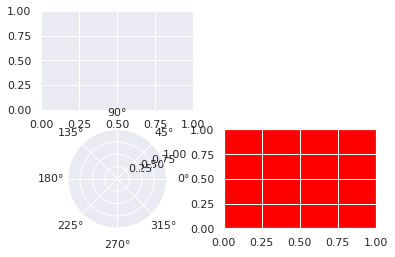

In [37]:
plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2 = plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

# make the first axes "current" again
plt.subplot(221)

In [27]:
decomp.resid

ds
2021-01-04 00:00:00+01:00         NaN
2021-01-05 00:00:00+01:00         NaN
2021-01-06 00:00:00+01:00         NaN
2021-01-07 00:00:00+01:00    2.044685
2021-01-08 00:00:00+01:00   -5.626414
                               ...   
2021-10-06 00:00:00+02:00   -1.249369
2021-10-07 00:00:00+02:00   -3.002934
2021-10-08 00:00:00+02:00         NaN
2021-10-09 00:00:00+02:00         NaN
2021-10-10 00:00:00+02:00         NaN
Freq: D, Name: resid, Length: 280, dtype: float64

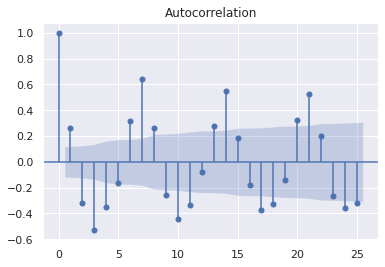

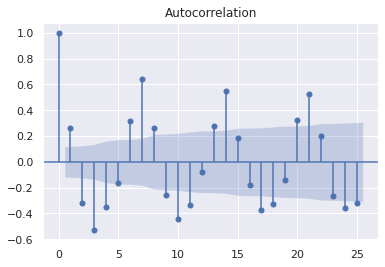

In [28]:
plot_acf(decomp.resid.dropna())